### Intalling libs

In [1]:
# pip install pydotplus

### Column description

| Variável 	| Descrição 	|
|:-:	|:-	|
|CRIM   | Taxa de crimes per capita por cidade 	|
|ZN     | Proporção de áreas residenciais zoneadas para lotes acima de 25 mil pés quadrados (aproximadamente 2.320 metros quadrados|
|INDUS  | Proporção de acres para negócios não ligados ao varejo por cidade|
|CHAS   | Variável dummy sobre Rio Charles (1 se a região faz fronteira com rio; 0 caso contrário)|
|NOX    | Concentração de óxidos nítricos (partes por 0 milhões)|
|RM     | Número médio de cômodos por habitação|
|AGE    | Proporção de unidades ocupadas por proprietários construídas antes de 1940|
|DIS    | Distâncias ponderadas até cinco centros de empregos em Boston|
|RAD    | Índice de acessibilidade às rodovias radiais|
|TAX    | Taxa de impostos sobre o valor total da propriedade por 10 mil dólares|
|PTRATIO| Razão entre aluno-professor por cidade|
|B      | 1000(Bk - 0.63) ^ 2 em que Bk é a proporção de negros (Bk = Black) por cidade (conjunto de dados de 1978)|
|LSTAT  | Porcentagem da população com status mais baixo|
|MEDV   | Valor médio das casas ocupadas por proprietários em incrementos de 1000 dólares|


### Importing Libs

In [43]:
# dataset import
from sklearn.datasets import (
    load_boston
)

# data visualization
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt

from seaborn import (
    jointplot,
    pairplot,
    boxplot,
    heatmap
)

from yellowbrick.features import (
    Rank2D, 
    RadViz,
    FeatureImportances,
    ParallelCoordinates,
    JointPlotVisualizer,
)

from yellowbrick.classifier import (
    ConfusionMatrix
)

import dtreeviz

import pydotplus

from io import(
    StringIO
)

from IPython.display import (
    Image
)

# data manipulation
import numpy as np
import pandas as pd
from pandas.plotting import(
    radviz
)

import janitor as jn

from ydata_profiling import ProfileReport

# missing values
import missingno as msno

from sklearn.impute import (
    SimpleImputer
)

# machine learning models
from sklearn import (
    svm,
    tree,
    impute,
    ensemble,
    preprocessing,
    model_selection
)

from sklearn.utils import (
    resample
)

from sklearn.dummy import (
    DummyClassifier
)

from sklearn.model_selection import (
    train_test_split
)

from sklearn.experimental import (
    enable_iterative_imputer
)

from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.tree import (
    plot_tree,
    export_graphviz,
    DecisionTreeRegressor,
    DecisionTreeClassifier,
)

from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.svm import (
    SVC,
    SVR
)

from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier
)

from imblearn.over_sampling import (
    RandomOverSampler,
)

from sklearn.dummy import (
    DummyRegressor
)

import shap

import rfpimp

import lightgbm as lgb

import xgboost as xgb

from xgboost import (
    XGBRegressor
)

import xgbfir

# data model metrics
from lime import (
    lime_tabular
)

from treeinterpreter import (
    treeinterpreter as ti
)

from sklearn.metrics import (
    auc,
    f1_score,
    roc_curve,
    recall_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    confusion_matrix,
    average_precision_score
)

import scikitplot as skplt

from yellowbrick.classifier import (
    ROCAUC,
    ClassBalance,
    ConfusionMatrix,
    ClassPredictionError,
    ClassificationReport,
    PrecisionRecallCurve,
    DiscriminationThreshold,
)

from yellowbrick.model_selection import (
    LearningCurve,
    ValidationCurve,
)

from scipy import (
    stats
)

# data prep-model
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    learning_curve
)

# model deploy
import pickle

### Regression
**Regression** is a supervised machine learning process. It is similar to classification, but instead of predicting a label (target), it tries to predict a continuous (numeric) value.<br><br>
The fact is that **sklearn** is capable of applying many of the same **classification** models to **regression** problems. In effect, the API is the same and calls *.fit*, *.score*, and *.predict*.<br><br>
For the **regression**, we will use a Boston housing dataset.

### Reading the Boston Housing Dataset

In [3]:
# loading boston dataset
b = load_boston()

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

### Preparing the dataset

In [4]:
# creating X dataset
bos_X = pd.DataFrame(b.data, columns=b.feature_names)

# creating y dataset
bos_y = b.target

# train_test_split dataset
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42
)

bos_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Preparing the standardized dataset

In [5]:
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)

bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y, test_size=0.3,
    random_state=42
)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

### Base model
A basic regression model can give us something against which we can compare other models.<br><br>
No **skear**, the default result of the *.score()* method is the *coefficient of determination* (*r2 or R2*). This number explains the percentage of variation in the input data captured by the forecast. In general, the value will be between 0 and 1, but may be negative in the case of particularly dilapidated models.<br><br>
The default strategy of *DummyRegressor* is to predict the average value of the training set.

In [6]:
dr = DummyRegressor()

dr.fit(bos_X_train, bos_y_train)

dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

### Linear regression
A simple **linear regression** tries to adapt the formula *y = mx + b*, while minimizing the square of errors. When applied, we have an *intercept* and a *coefficient*. <br><br>
The *intercept* provides a base value for a prediction, modified by the sum of the product between the coefficient and the input data. This format can be generalized to larger dimensions. In this case, each attribute will have a coefficient. The higher the absolute value of the coefficient, the more impact the attribute will have on the target.<br><br>
This model assumes that the prediction is a linear combination of the input data. For some datasets this would not be enough. More complexity can be added through attribute transformation (**sklearn**'s *preprocessing.PolynomialFeatures* transformer is capable of creating polynomial combinations of attributes). If this results in overfitting, **ridge** and **lasso** regressions can be used to regularize the estimator.<br><br>
This model is also susceptible to *heteroscedasticity*. *Heteroscedasticity* is the idea that as input values change, so does the prediction error (or residuals). Another issue that must be considered is *multicollinearity*. That is, if the columns have a high level of correlation, it will be more difficult to interpret the coefficients.

**Model Properties**<br><br>
*Efficiency in execution*
- use *n_jobs* to improve performance

*Data pre-processing*
- standardize data before doing model training

*To avoid overfitting*
- we can simplify the model by not using or adding polynomial attributes

*Interpretation of results*
- it is possible to interpret the results as weights for the contribution of the attributes, but it is assumed that the attributes have a normal distribution and are independent. You can remove collinear attributes to make interpretation easier. R2 will inform the extent to which the total variance of the result is explained by the model

In [7]:
lr = LinearRegression()

lr.fit(bos_X_train, bos_y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

LinearRegression()

In [8]:
lr.score(bos_X_test, bos_y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.7112260057484948

In [9]:
lr.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

### Instance parameters

*n_jobs*
- number of CPUs to be used

*coef_*
- linear regression coefficients

*intercept*
- intercept of the linear model. The intercept value is the expected mean value. We can see how scaling the data affects the coefficients. The sign of the coefficients explains the direction of the relationship between the attribute and the target. A positive sign indicates that as the attribute increases, the label increases. A negative sign shows that as the attribute increases, the label decreases. The greater the absolute value of the coefficient, the greater the impact it will have

In [10]:
lr2 = LinearRegression()

lr2.fit(bos_sX_train, bos_sy_train)

LinearRegression()

In [11]:
lr2.score(bos_sX_test, bos_sy_test)

0.7112260057484927

In [12]:
lr2.coef_

array([-1.14691411,  0.83432605,  0.33940694,  0.79163612, -1.784727  ,
        2.84783949, -0.30429306, -2.91562521,  2.11140045, -1.46519951,
       -1.9696347 ,  1.07567771, -3.90310727])

We can use the **Yellowbrick** lib to visualize the coefficients. Since the scaled Boston data is not a **pandas** DataFrame but a **numpay** array, we need to pass the *labels* parameters if we want to use the column names.

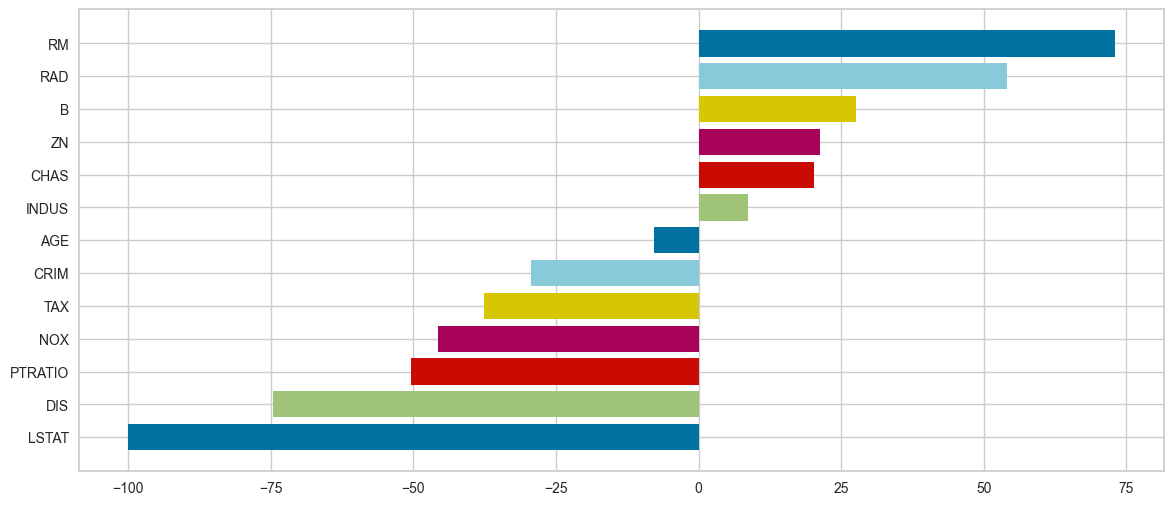

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))

fi_viz = FeatureImportances(
    lr2, labels=bos_X.columns
)

fi_viz.fit(bos_sX, bos_y)

fig.savefig("images/regression_linear_regression_boston_yellowbrick")

### SVMs
SVMs (support vector machines) can also do regression.

Model Properties
*Efficiency in execution*
- may be difficult to scale to larger sizes. Using a linear kernel or the *LinearSVR* model can improve execution performance, perhaps at the expense of accuracy

*Data pre-processing*
- the algorithm is not scale invariant, so standardizing the data is highly recommended

*To avoid overfitting*
- the parameter *C* (penalty) controls the regularization. A smaller value allows for a smaller margin in the hyperplane. A higher value for **gamma** will tend to overfit the training data. The **LinearSVR** model accepts *loss* and *penalty* parameters for regularization. The *epsilon* parameter can be increased

*Interpretation of results*
- inspect *.support_vectors_*, although those are difficult to interpret. With linear kernels you will be able to inspect *.coef_*

In [14]:
svr = SVR()

svr.fit(bos_sX_train, bos_sy_train)

SVR()

In [15]:
svr.score(bos_sX_test, bos_sy_test)

0.6551893976487937

**Instance parameters**

*c=1.0*
- is the penalty parameter. The smaller the value, the narrower the decision boundary (more overfitting)

*cache_size=200*
- cache size (MB). Increasing this value can improve training time on large datasets

*coef=0.0*
- independent term for polynomial and sigmoid kernels

*degree=3*
- degree for polynomial kernel

*epsilon=0.1*
- defines a tolerance margin in which no penalty will be applied to errors. Should be smaller for larger datasets

*gamma='auto'*
- kernel coefficient

*kernel='rbf'*
- kernel type: *linear*, *poly*, *rbf* (default), *sigmoid*, *precomputed* or a function

*max_iter=-1*
- maximum number of iterations

*probability=False*
- activates probability estimation. Makes training slower

*shrinkin=True*
- uses shrinking heuristics

*tol=0.001*
- stopping tolerance<br><br>

**Attributes after adjustment**

*support_*
- index of support vectors

*support_vectors_*
- support vectors

*coef_*
- coefficients for kernel

*intercept_*
- constant for decision function

### K nearest neighbors
The KNN (K-Nearest-Neighbor) model also accepts regression, and finds k target neighbors for the sample on which we want to make a prediction. In regression, this model averages the targets to determine a prediction.
<br><br>
**Model Properties**<br>
*Efficiency in execution*
- training time is O(1), but there is a trade-off as sample data needs to be stored

*Data pre-processing*
- yes, distance-based calculations perform better when there is standardization

*To avoid overfitting*
- elevate *n_neighbors*. Change *p* to the **L1** or **L2** metric

*Interpretation results*
- interpret the k nearest neighbors of the sample (using the *.kneighbors* method)

In [16]:
knr = KNeighborsRegressor()

knr.fit(bos_sX_train, bos_sy_train)

KNeighborsRegressor()

In [17]:
knr.score(bos_sX_test, bos_sy_test)

0.7476242635592416

**Attributes after adjustment**
*algotithm='auto'*
- can be *brute*, *ball_tree*, or *kd_tree*

*leaf_size=30*
- used in tree-based algorithms

*metric='minkowski'*
- distance metric

*metric_params=None*
- additional parameter dictionary for custom metric function

*n_jobs=1*
- number of CPUs

*n_neighbors=1*
- number of neighbors

*p=2*
- minlowski power parameter: 1 = manhattan (L1); 2 = Euclidean (L2)

*weights='uniform'*
- can be *distance*, in which case closer points will have more influence

### Decision tree
Decision trees support classification and regression. At each level of the tree, various separations in attributes are evaluated. The separation that generates the smallest error (impurity) will be chosen. The *criterion* parameter can be adjusted to determine the metric for impurity.
<br><br>
Model Properties
*Efficiency in execution*
- for creation, go through each of the *m* attributes and order all *n* samples: O(mn log n)

*Pre-processing data*
- no need to climb. Need to get rid of missing values ​​and convert them to numeric data

*To avoid overfitting*
- set *max_depth* to a smaller number and increase *min_impurity_decrease*

*Interpretation of results*
- it is possible to scroll through the options tree. Because there are steps, a tree is bad at dealing with linear relationships (a small change in the values ​​of an attribute can result in the formation of an entirely different tree). The tree is also extremely dependent on the training data. A small change can change the entire tree

In [18]:
dtr = DecisionTreeRegressor(random_state=42)

dtr.fit(bos_X_train, bos_y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

DecisionTreeRegressor(random_state=42)

In [19]:
dtr.score(bos_X_test, bos_y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.8444833592340152

**Model properties**
*criterion='mse'*
- separation function. The default is mean squared error (L2 loss). Could be 'friedman_mse' or 'mae' (L1 loss)

*max_depth=None*
- depth of the tree. The default will be to build the tree until the leaves contain less than *min_samples_split*

*max_features=None*
- number of attributes to be analyzed for separation. The default is all

*max_leaf_nodes=None*
- limits the number of sheets. The default is unlimited

*min_impurity_decrease=0.0*
- splits a node if splitting decreases the impurity by an amount greater than or equal to that

*min_samples_leaf=1*
- minimum number of samples on each sheet

*min_samples_split=2*
- minimum number of samples needed to split a node

*min_weight_fraction_leaf=0.0*
- minimum sum of weights required for leaf-type nodes

*presort=False*
- can speed up training with a smaller dataset or restricted depth if set to **True**

*splitter='best*
- use *random* or *best*<br><br>
**Attributes after adjustment**
*feature_importances_*
- array of importance of Gini

*max_features*
- calculated value of *max_features*

*n_outputs_*
- saídas number

*n_features_*
- number of attributes

*tree*
- underlying arvore object

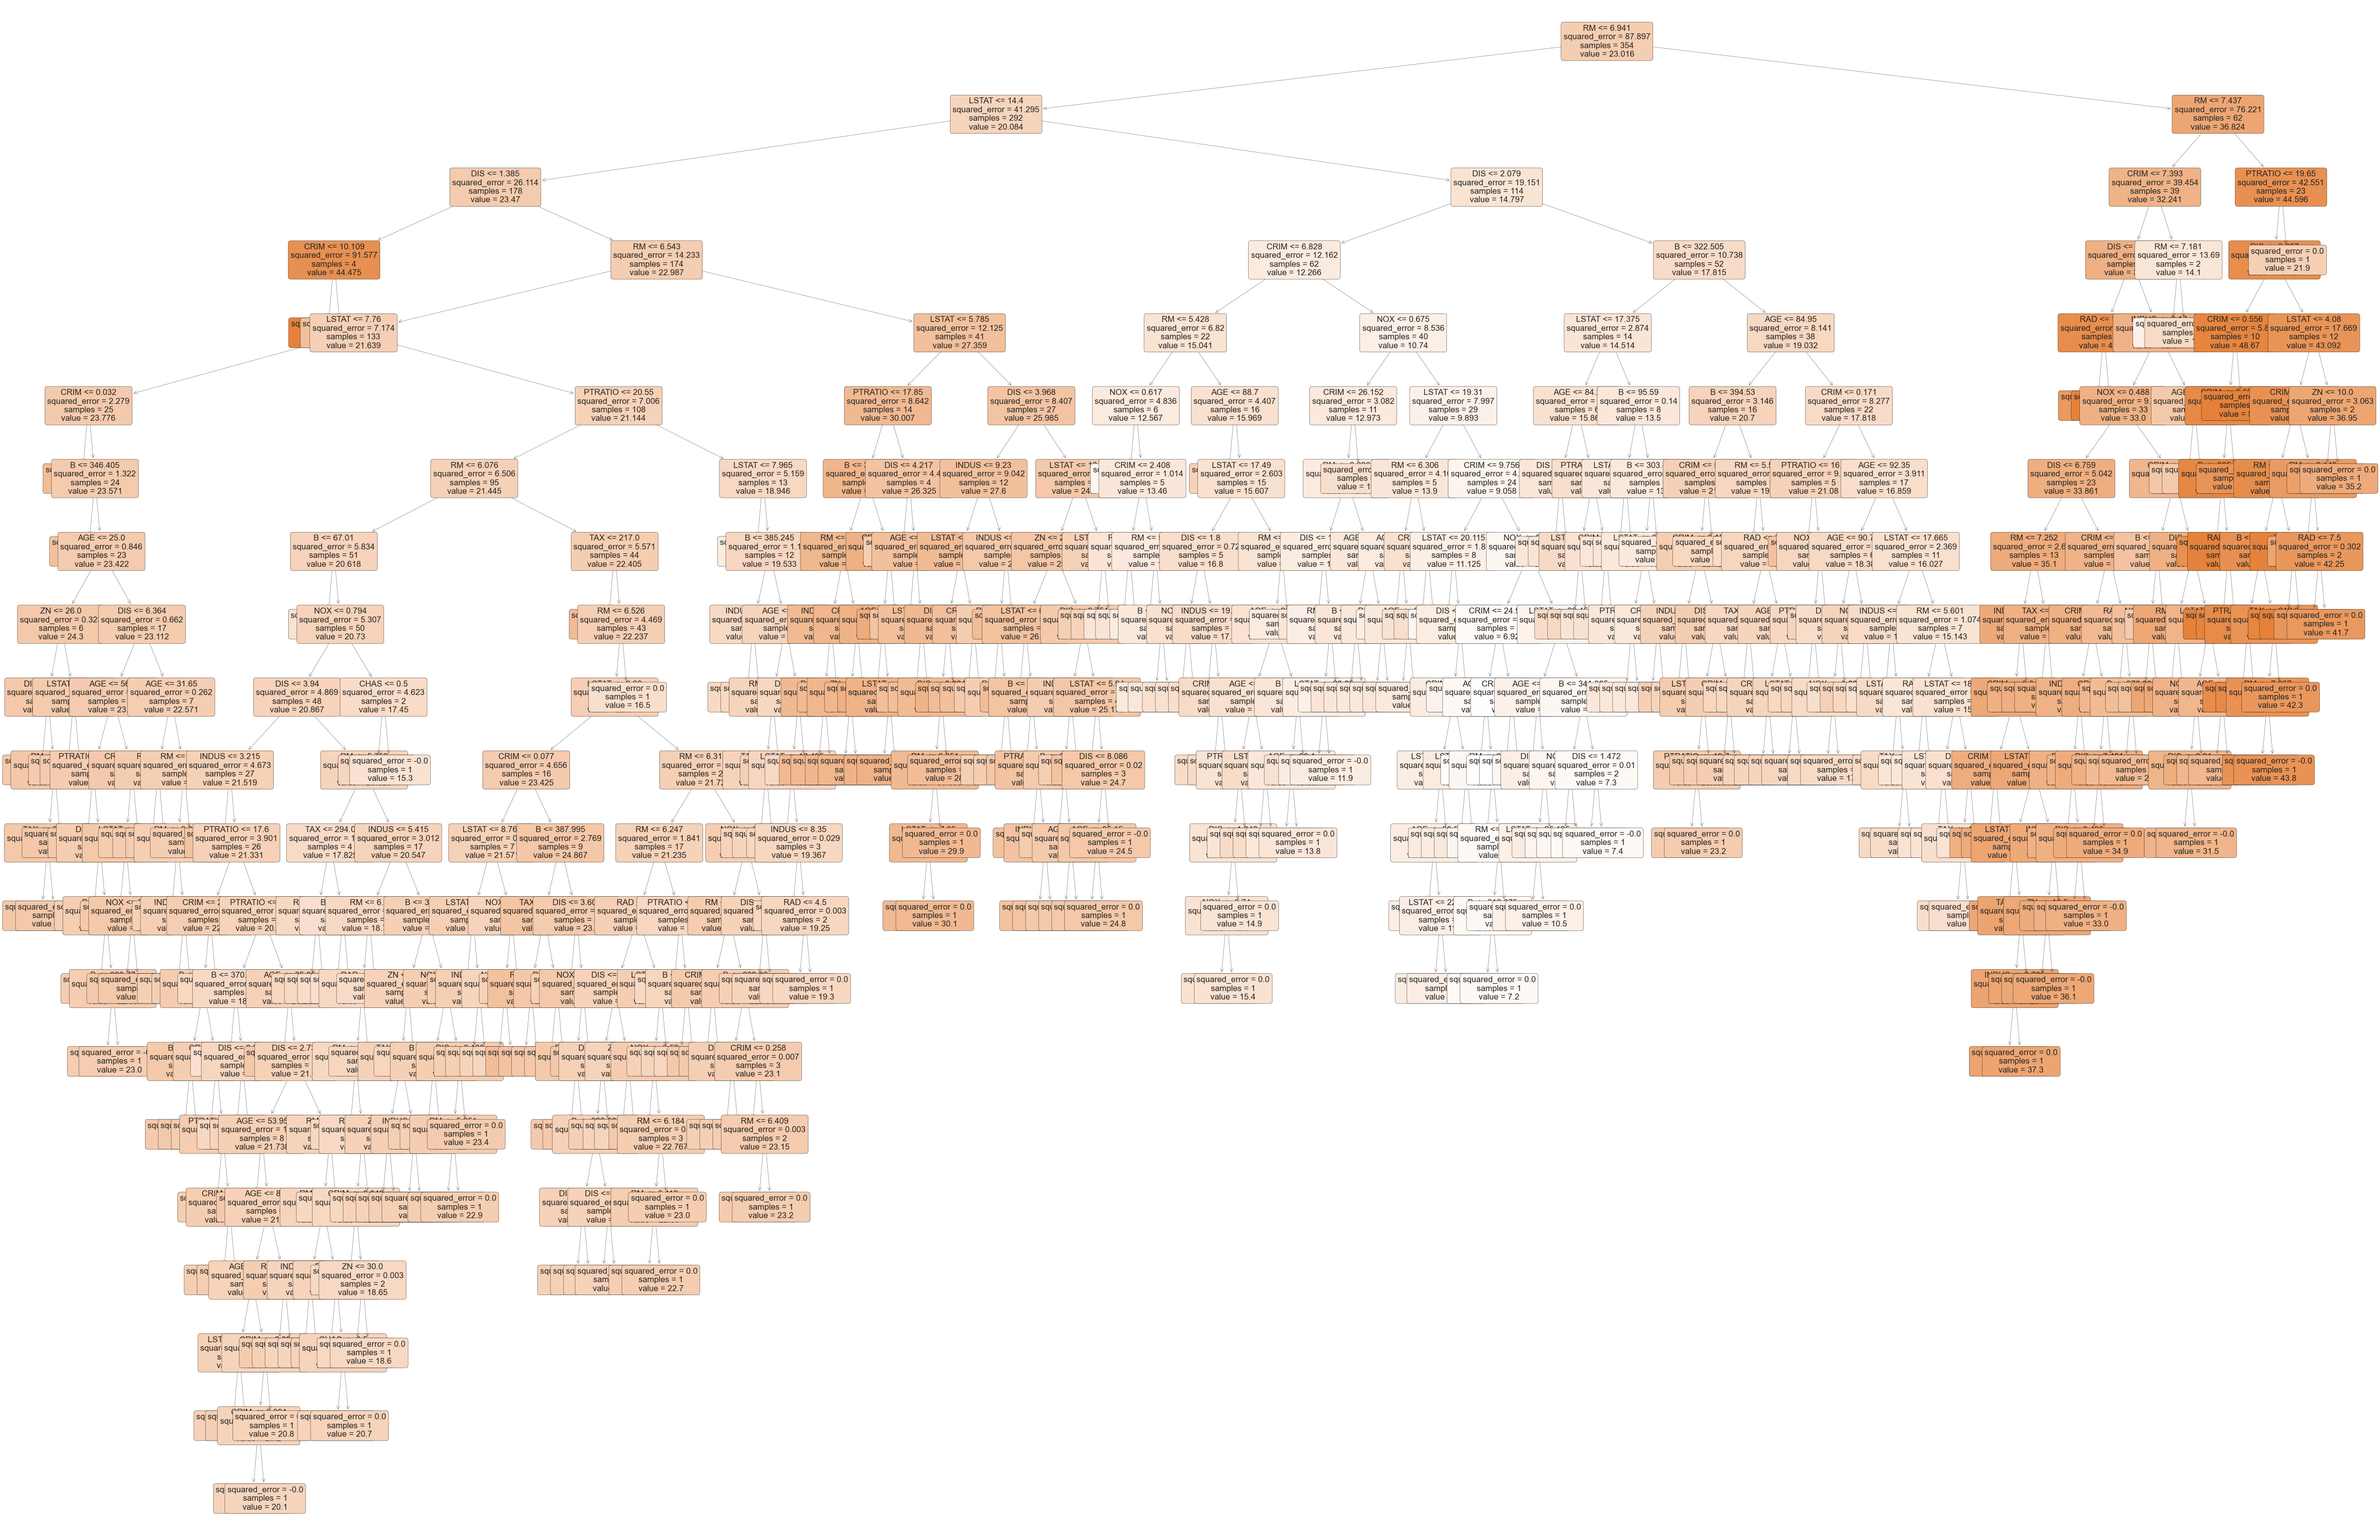

In [20]:
# plotting regression tree
fig = plt.figure(figsize=(60, 40))
tree.plot_tree(dtr, 
               filled=True,
               rounded=True, 
               feature_names=bos_X.columns,
               fontsize=12)

fig.savefig("images/regression_tree_decision_boston_yellowbrick")

plt.show()

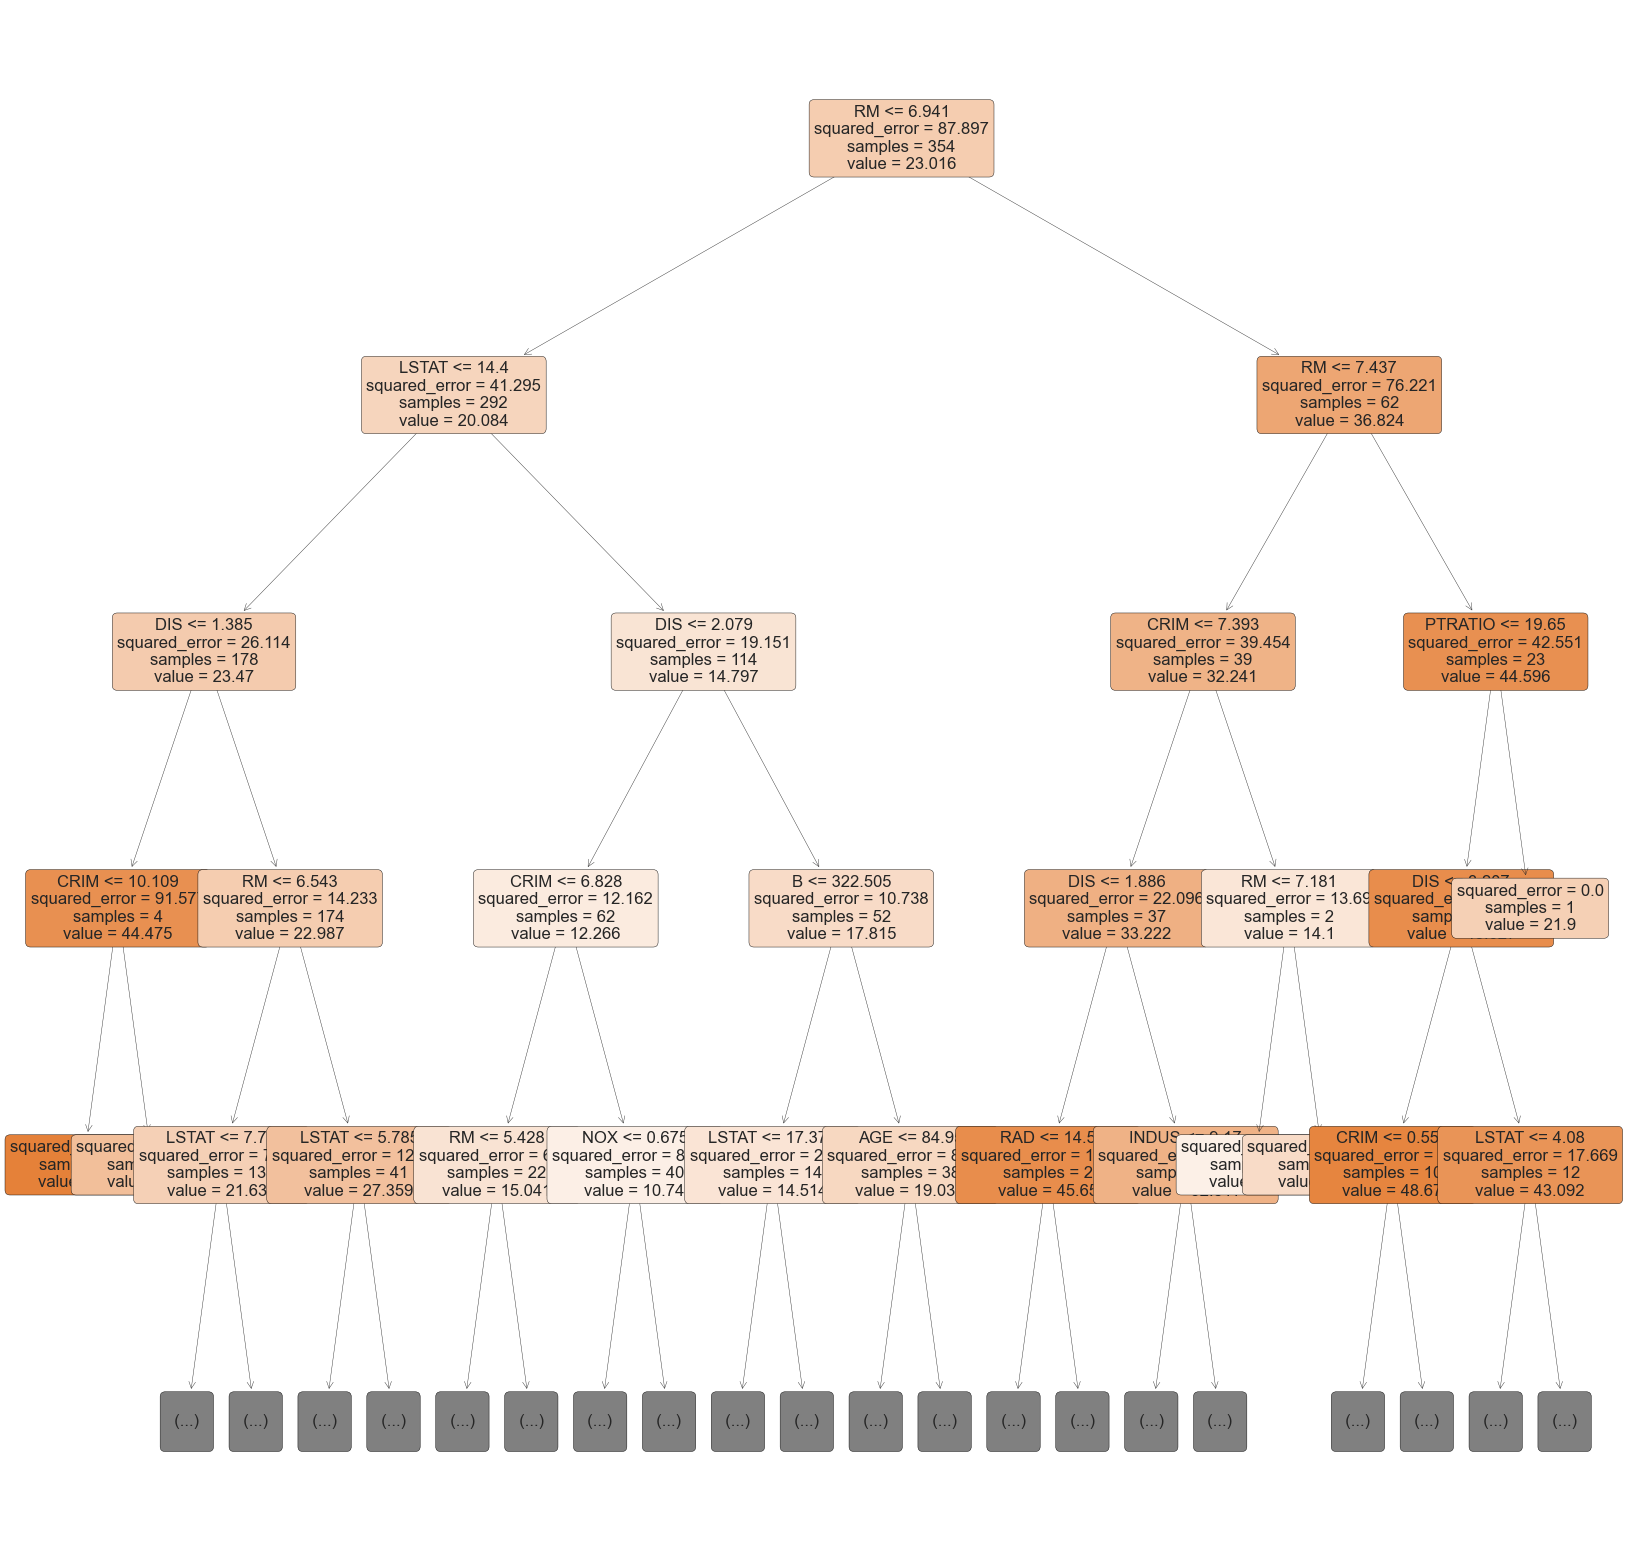

In [21]:
# plotting regression tree with max_depth=4
fig = plt.figure(figsize=(20, 20))
tree.plot_tree(dtr, 
               filled=True,
               max_depth=4,
               rounded=True, 
               feature_names=bos_X.columns,
               fontsize=12)

fig.savefig("images/regression_tree_decision_max_depth4_boston_yellowbrick")

plt.show()

In [22]:
# feature importances of attributes
for col, val in sorted(
    zip(
        bos_X.columns, dtr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.576
LSTAT          0.190
DIS            0.110
CRIM           0.058
PTRATIO        0.025


### Random forest
Decision trees are good because they are explainable, but they have a tendency to overfitting. A random forest trades some of the ease of explanation for a model with a better tendency to generalize. This model can also be used for regression.<br><br>
**Model properties**<br>
*Efficiency in execution*
- must create *j* random trees. This can be done in parallel using *n_jobs*. The complexity of each tree is O(mn log n), where *n* is the number of samples and *m* is the number of attributes. Upon creation, loop through each of the *m* attributes in a loop and sort all *n* samples

*Pre-processing data*
- not necessary as long as the input is numeric and there are no missing values

*To avoid overfitting*
- add more trees (*n_estimators*). use a smaller value of *max_depth*

*Interpretation of results*
- has support for attribute importance, but there is no single decision tree to traverse

In [23]:
rfr = RandomForestRegressor(
    random_state=42, n_estimators=100
)

rfr.fit(bos_X_train, bos_y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

RandomForestRegressor(random_state=42)

In [24]:
rfr.score(bos_X_test, bos_y_test)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.8708997131330258

**Instance parameters**<br>
*bootstrap=True*
- uses bootstrap when building the trees

*criterion='mse'*
- separation function, 'mother'

*max_depth=None*
- depth of the tree. The default will be to build the tree until the leaves contain less than *min_samples_split*

*max_features='auto'*
- number of attributes to analyze in the separation

*max_leaf_nodes=None*
- limits the number of sheets

*min_impurity_decrease=0.0*
- splits a node if splitting decreases the impurity by an amount greater than or equal to that

*min_samples_leaf*
- minimum number of samples on each sheet

*min_samples_split=2*
- minimum number of samples required to split a node

*min_weight_fraction_leaf=0.0*
- minimum sum of weights required for leaf-type nodes

*n_estimators=10*
- number of trees 

*n_jobs=None*
- number of jobs for adaptation and prediction

*oob_score=False*
- tells whether to use **OOB** samples to estimate the score on previously unseen data

*warm_start=False*
- adapts a new forest or uses an existing forest<br><br>

**Attributes after adjustment**<br>
*estimators_*
- collection of trees

*feature_importances_*
- Gini importance matrix

*n_classes_*
- number of classes

*n_features_*
- number of attributes

*oob_score_*
- training dataset scoring using **OOB** estimates

In [25]:
# feature importances
for col, val in sorted(
    zip(
        bos_X.columns, rfr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True
)[:5]:
    print(f"{col:10}{val:10.3f}")

RM             0.440
LSTAT          0.380
DIS            0.066
CRIM           0.032
PTRATIO        0.019


### XGBoost Regression
The **XGBoost** library also supports regression. It builds a simple decision tree and then boosts it by adding subsequent trees. Each tree tries to correct the residuals from the previous output.<br><br>
**Model properties**<br>
*Efficiency in execution*
- **XGBoost** can run in parallel. Using the *n_jobs* option to inform the number of CPUs

*Data pre-processing*
- no need to scale with tree-based models. You must encode the category data. Accept missing data

*To avoid overfitting*
- the parameter *early_stopping_rounds=N* can be defined to stop training if there is no improvement after *N* rounds. **L1** and **L2** regularizations are controlled by *reg_alpha* and *reg_lambda*, respectively

*Interpretation results*
- includes importance of attributes

In [26]:
xgr = XGBRegressor(random_state=42)

xgr.fit(bos_X_train, bos_y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [27]:
xgr.score(bos_X_test, bos_y_test)

0.8729544676981909

In [28]:
xgr.predict(bos_X.iloc[[0]])

array([26.637667], dtype=float32)

**Instance parameters**<br>
*max_depth=3*
- maximum depth

*learning_rate=0.1*
- learning rate for boosting (between 0 and 1). After each boosting step, the newly added weights are scaled according to this factor. The lower the value, the more conservative it will be, but more trees will also be needed to converge. In the *.train* call you can pass a *learning_rates* parameter, which is a list of rates in each round

*nestimators=100*
- number of rounds or improved trees

*silent=True*
- informs whether to display messages during boosting execution

*objective="reg:linear"*
- learning task or collabe for classification

*booster="gbtree"*
- can be "gbtree", "gblinear" or "dart". The "dart" option adds discards (discards random trees to avoid overfitting). The "gblinear" option creates a regularized linear model

*n_jobs*
- number of threads to be used

*gamma=0*
- Minimum loss reduction required to split one more sheet

*max_delta_step=0*
- makes updates more conservative

*min_child_weight=1*
- minimum value for a child's Hessian sum

*subsample=1*
- fraction of samples to be used in the next boosting round

*colsample_bytree=1*
- range of columns to be used per boosting round

*colsample+bylevel=1*
- fraction of columns to be used per tree level

*colsample_bynode=1*
- fraction of columns to be used per division (tree node)

*reg_alpha=0*
- **L1** regularization (weight average). Increase the value to be more conservative

*reg_lambda=1*
- **L2** regularization (square root of the weights). I increase the value to be more conservative

*base_score=.5*
- initial forecast

*missing=None*
- interpretation value for missing data

*importance_type="gain"*
- importance type of attributes: "gain", "weight", "cover", "total_gain" or "total_cover"
<br><br>

**Attributes after adjustment**<br>
*coef_*
- coefficients for learners gblinear (booster = "gblinear")

*intercept_*
- intercept for gblinear learners

*feature_importances_*
- importance of attributes for gbtree learners. Attribute importance is the average gain across all nodes where the attribute is used

In [29]:
for col, val in sorted(
    zip(
        bos_X.columns, xgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True
)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT          0.403
RM             0.307
DIS            0.087
PTRATIO        0.068
TAX            0.029


**XGBoost** includes graphing capabilities for attribute importance. Observe that the *importance_type* parameter modifies the values ​​in the graph

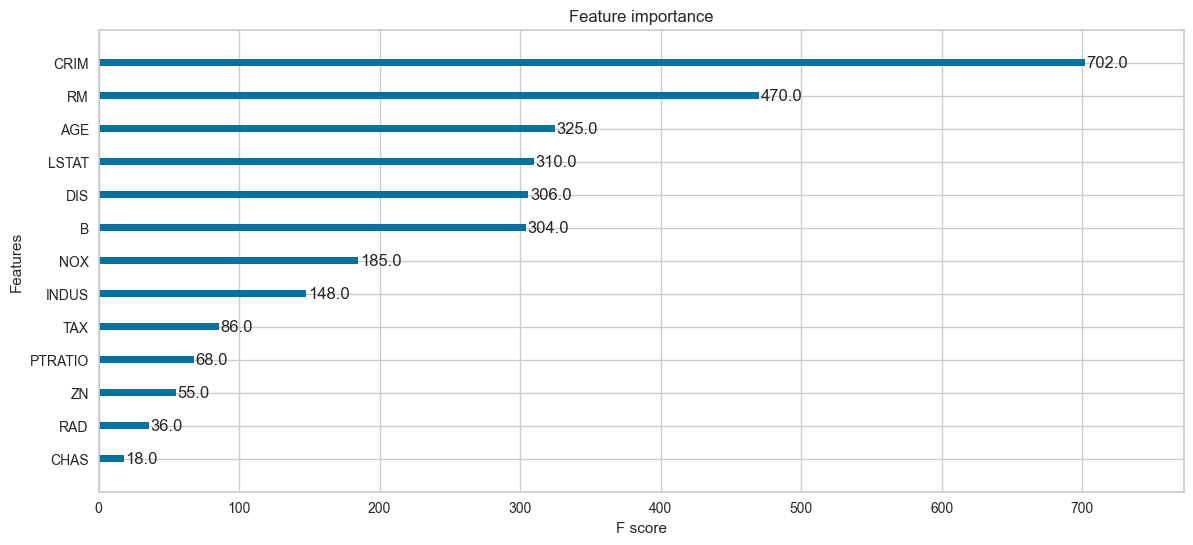

In [30]:
fig, ax = plt.subplots(figsize=(14, 6))

xgb.plot_importance(xgr, ax=ax)

fig.savefig("images/regression_xgboost_regressor_xgboost")

We can use the **Yellowbrick** lib to generate a graph of feature importance (the *feature_importances_ attribute will be normalized)*

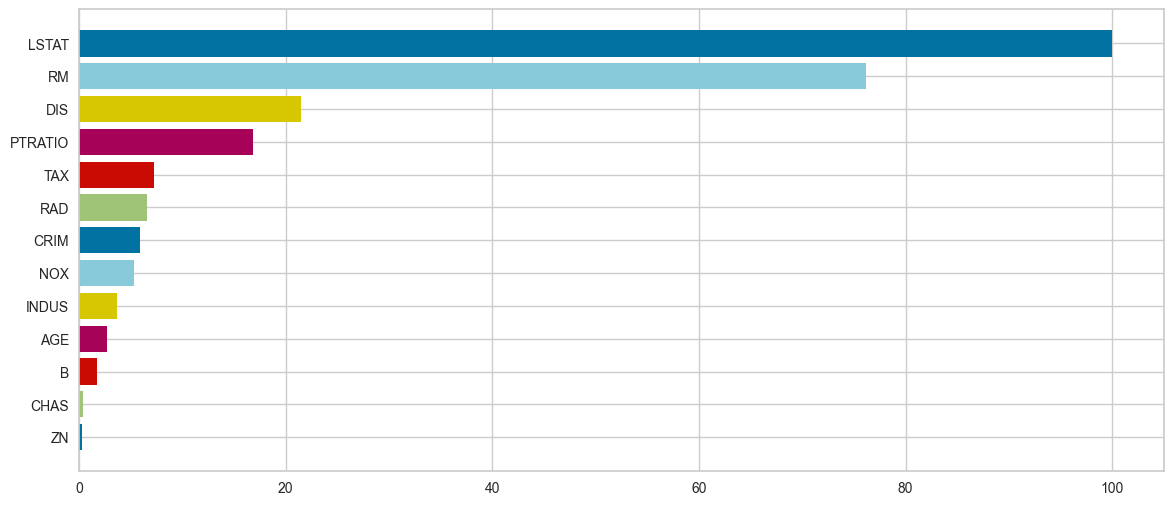

In [31]:
fig, ax = plt.subplots(figsize=(14, 6))

fi_viz = FeatureImportances(xgr)

fi_viz.fit(bos_X_train, bos_y_train)

fig.savefig("images/regression_xgboost_regressor_yellowbrick")

**XGBoost** enables both textual and graphical representation of trees. Next, we have the textual representation

In [32]:
booster = xgr.get_booster()

print(booster.get_dump()[0])

0:[RM<6.94299984] yes=1,no=2,missing=2
	1:[LSTAT<14.4300003] yes=3,no=4,missing=4
		3:[DIS<1.38610005] yes=7,no=8,missing=8
			7:[CRIM<8.49213028] yes=15,no=16,missing=16
				15:leaf=6.07144117
				16:leaf=0.732627034
			8:[RM<6.54899979] yes=17,no=18,missing=18
				17:[LSTAT<7.78999996] yes=25,no=26,missing=26
					25:[LSTAT<5.63999987] yes=35,no=36,missing=36
						35:leaf=0.787097394
						36:leaf=0.0659914389
					26:[RM<6.10099983] yes=37,no=38,missing=38
						37:leaf=-0.759166777
						38:leaf=-0.301650971
				18:[LSTAT<7.01000023] yes=27,no=28,missing=28
					27:[PTRATIO<17.8999996] yes=39,no=40,missing=40
						39:leaf=2.06367588
						40:leaf=0.838728786
					28:[DIS<3.4217] yes=41,no=42,missing=42
						41:leaf=1.1530751
						42:leaf=0.18386735
		4:[DIS<2.07879996] yes=9,no=10,missing=10
			9:[CRIM<6.39311981] yes=19,no=20,missing=20
				19:[AGE<88.5] yes=29,no=30,missing=30
					29:leaf=-0.242373005
					30:leaf=-2.37043929
				20:leaf=-3.59292293
			10:[B<316.029999] yes=

Leaf values can be interpreted as the sum of *base_score* and the leaf. To validate this, call *.predict* with parameter *ntee_limit=1* in order to limit the model to use the result from the first tree

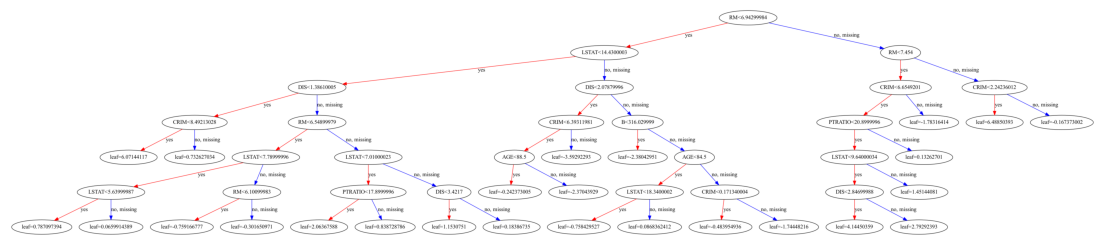

In [33]:
fig, ax = plt.subplots(figsize=(14, 6))

xgb.plot_tree(xgr, ax=ax, num_trees=0)

fig.savefig("images/regression_xgboost_regressor_interpreted_trees_results_xgboost")

### LightGBM Regression
The Gradient Boosting Tree lib (**LightGBM**) also supports regression. As we recall, it can be faster than **XGBoost** to create trees because of the sampling method used to determine node separations. Furthermore, it initially creates trees according to depth, so limiting them can harm the model.<br><br>
**Model properties**<br>
*Efficiency in execution*
- can take advantage of multiple CPUs. If you use binning, it can be 15 times faster than **XGBoost**

*Data pre-processing*
- has some support for encoding category columns as integers (or the pandas *Categorical* type), but the **AUC** appears to be worse compared to *one-hot-encode* encoding

*To avoid overfitting*
- reduce *num_leaves*, increase *min_data_in_leaf* and use *min_gain_to_split* with *lambda_l1* or *lambda_l2*

*Interpretation of results*
- importance of attributes is available. Individual trees are weak and tend to be difficult to interpret

In [34]:
lgr = lgb.LGBMRegressor(random_state=42)

lgr.fit(bos_X_train, bos_y_train)

LGBMRegressor(random_state=42)

In [35]:
lgr.score(bos_X_test, bos_y_test)

0.847729219534575

In [36]:
lgr.predict(bos_X.iloc[[0]])

array([30.31689569])

**Instance Parameters**<br>
*boosting_type*="gbdt"
- can be: "gbdt" (bossint gradient), "rf" (random forest), "dart" (dropouts meet multiple additive regression trees) or "goss" (gradient-based one-sided sampling)

*number_sheets=31*
- maximum number of tree leaves

*max_depth=.1*
- maximum tree depth, not which -1 means no limits. Greater depths tend to cause overfitting

*learning_rate=0.1*
- range of (0, 1] Learning Rate for **boosting**. A smaller value delays overfitting as **boosting** rounds will have less impact. A smaller number should result in better performance, but will require a larger value for *num_iterations*

*n_estimators=100*
- number of trees or boosting rounds

*subsamples_for_bin=200000*
- possible samples to create bins

*goal=None*
- **None** does a regression by default. can be a function or a string

*min_split_gain=0.0*
- ordinary loss reduction for partitioning a sheet

*min_child_weight=0.001*
- sum of the Hessian weight required for a sheet. higher values ​​will be more conservative

*min_child_samples20*
- number of ordinary samples for one sheet. smaller numbers imply more overfitting

*subsample=1.0*
- fraction of samples to be used in the next round

*subsample_freq=0*
- frequency of subsamples

*colsample_bytree=1.0*
- range of (0, 1]. Selected a percentage of attributes for each round of **boosting**

*reg_alfa=0.0*
- **L1** regularization (weight average). Increase the value to be more conservative

*reg_lambda=0.0*
- **L2** regularization (square root of the weights). Increase the value to be more conservative

*n_jobs*
- number of threads

*importance_type="split"*
- determine how importance is calculated: *split* (number of times an attribute was used) or *gain* (total gains from splits when an attribute was used)

In [37]:
for col, val in sorted (
    zip(
        bos_X.columns, lgr.feature_importances_
    ),
    key=lambda x: x[1],
    reverse=True
)[:5]:
    print(f"{col:10}{val:10.3f}")

LSTAT        226.000
RM           199.000
DIS          172.000
AGE          130.000
B            121.000


Attribute importance chart showing how many times an attribute is used

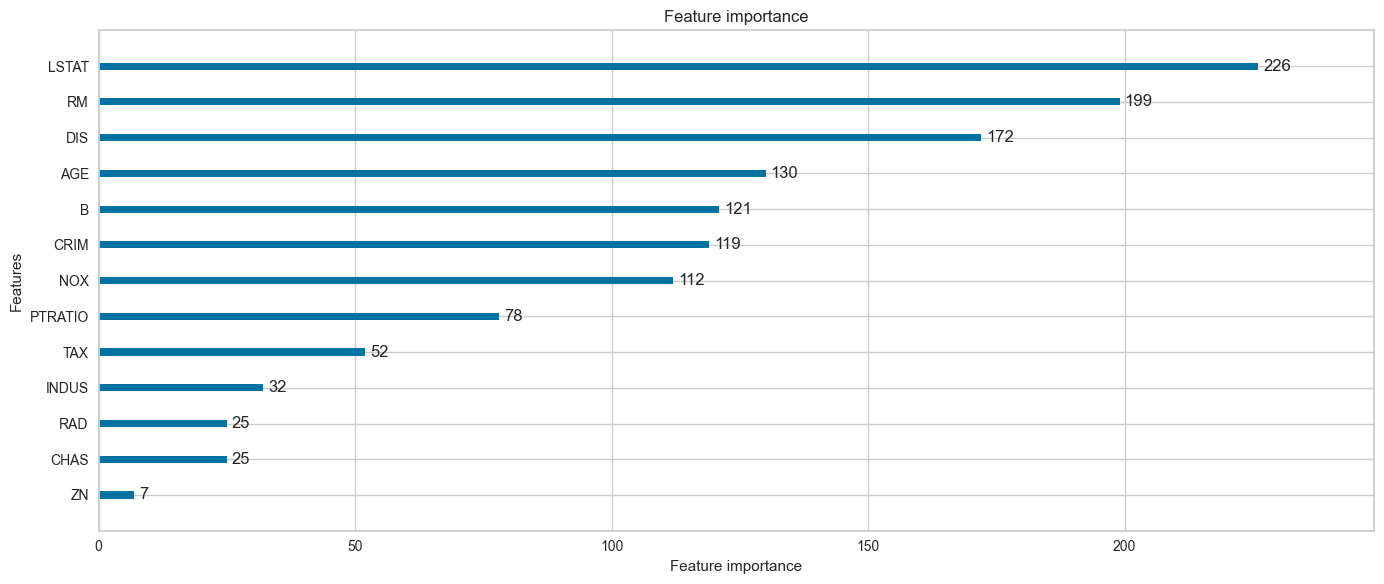

In [38]:
fig, ax = plt.subplots(figsize=(14, 6))

lgb.plot_importance(lgr, ax=ax)

fig.tight_layout()

fig.savefig("images/regression_lightgbm_regressor_lightgbm")

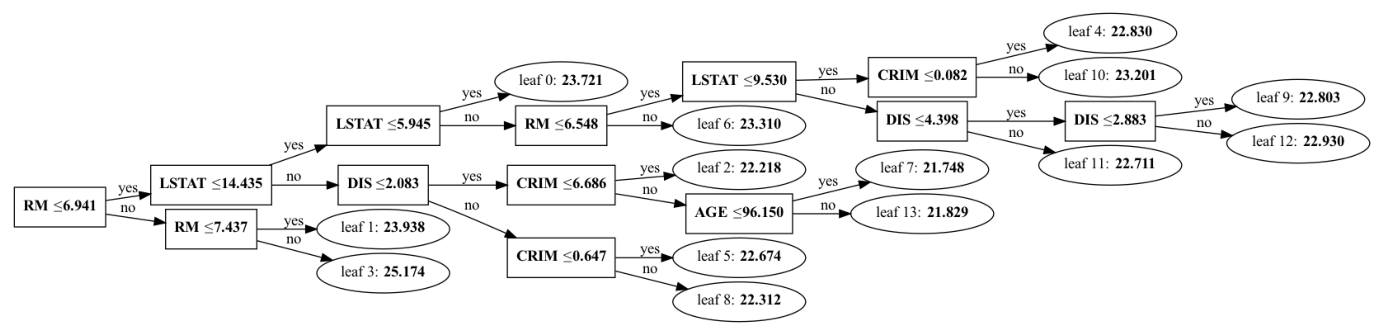

In [39]:
fig, ax = plt.subplots(figsize=(14, 6))

lgb.plot_tree(lgr, ax=ax)

fig.tight_layout()

fig.savefig("images/regression_lightgbm_regressor_interpreted_trees_results_lightgbm")

#### Residuals with normal distribution
The **scipy** lib includes a *probability plot* and the *Kolmogorov-Smirnov* test; both check whether the residuals have a normal distribution.<br>
Meanwhile, we can generate a *histogram* to visualize the residuals and check if they have a normal distribution

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

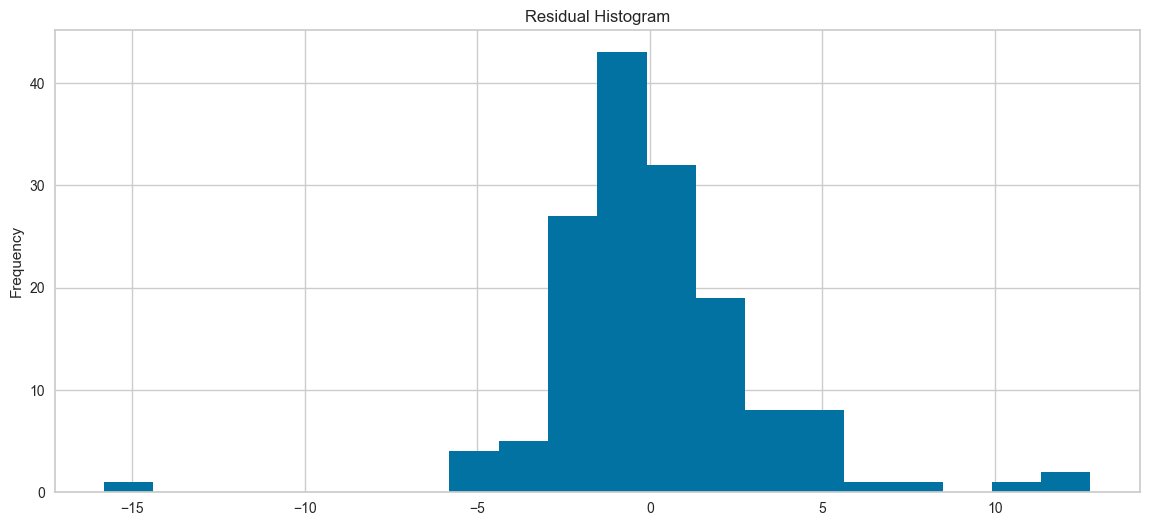

In [42]:
fig, ax = plt.subplots(figsize=(14, 6))

resids = bos_y_test - rfr.predict(bos_X_test)

pd.Series(resids, name="residuals").plot.hist(
    bins=20, ax=ax, title="Residual Histogram"
)

fig.savefig("images/regression_residuals_with_normal_distribution")

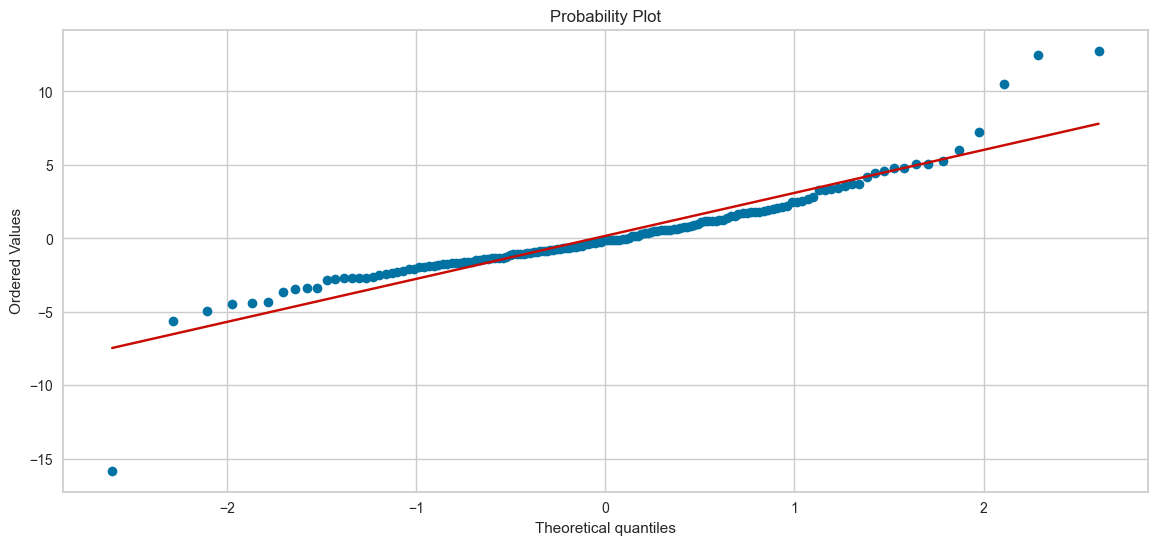

In [44]:
# using the scipy lib to plot a probability plot
fig, ax = plt.subplots(figsize=(14, 6))

_ = stats.probplot(resids, plot=ax)

fig.savefig("images/regression_residuals_with_normal_distribution_scipy")

The *Kolmogorov-Smirnov* test is able to assess whether a distribution is normal. If the p value is significant (< 0.05), it is a sign that the values ​​do not have a normal distribution.<br>
As we can see, this test fails, reporting that the residuals do not have a normal distribution.

In [45]:
stats.kstest(resids, cdf="norm")

KstestResult(statistic=0.2030324289045929, pvalue=5.705755737845543e-06)